In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

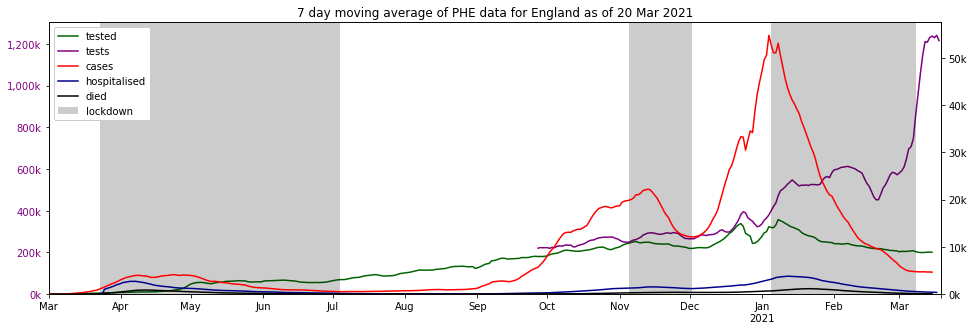

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

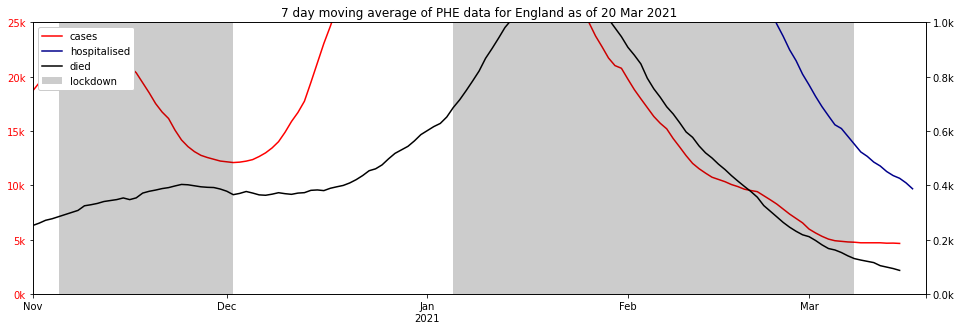

In [3]:
plot_summary(earliest_date='2020-11-01',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=25_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter, right_ymax=1_000)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,1520680.0,22873079.0,21352399.0,56286961,2.701656,37.934894,59.363450
1,Northern Ireland,N92000002,75313.0,662973.0,587660.0,1893667,3.977098,31.032911,64.989990
2,Scotland,S92000003,207028.0,2085525.0,1878497.0,5463300,3.789431,34.383925,61.826643
3,Wales,W92000004,329530.0,1231830.0,902300.0,3152879,10.451717,28.618288,60.929994


'partial: 26,853,407 (40.2%), full: 2,132,551'

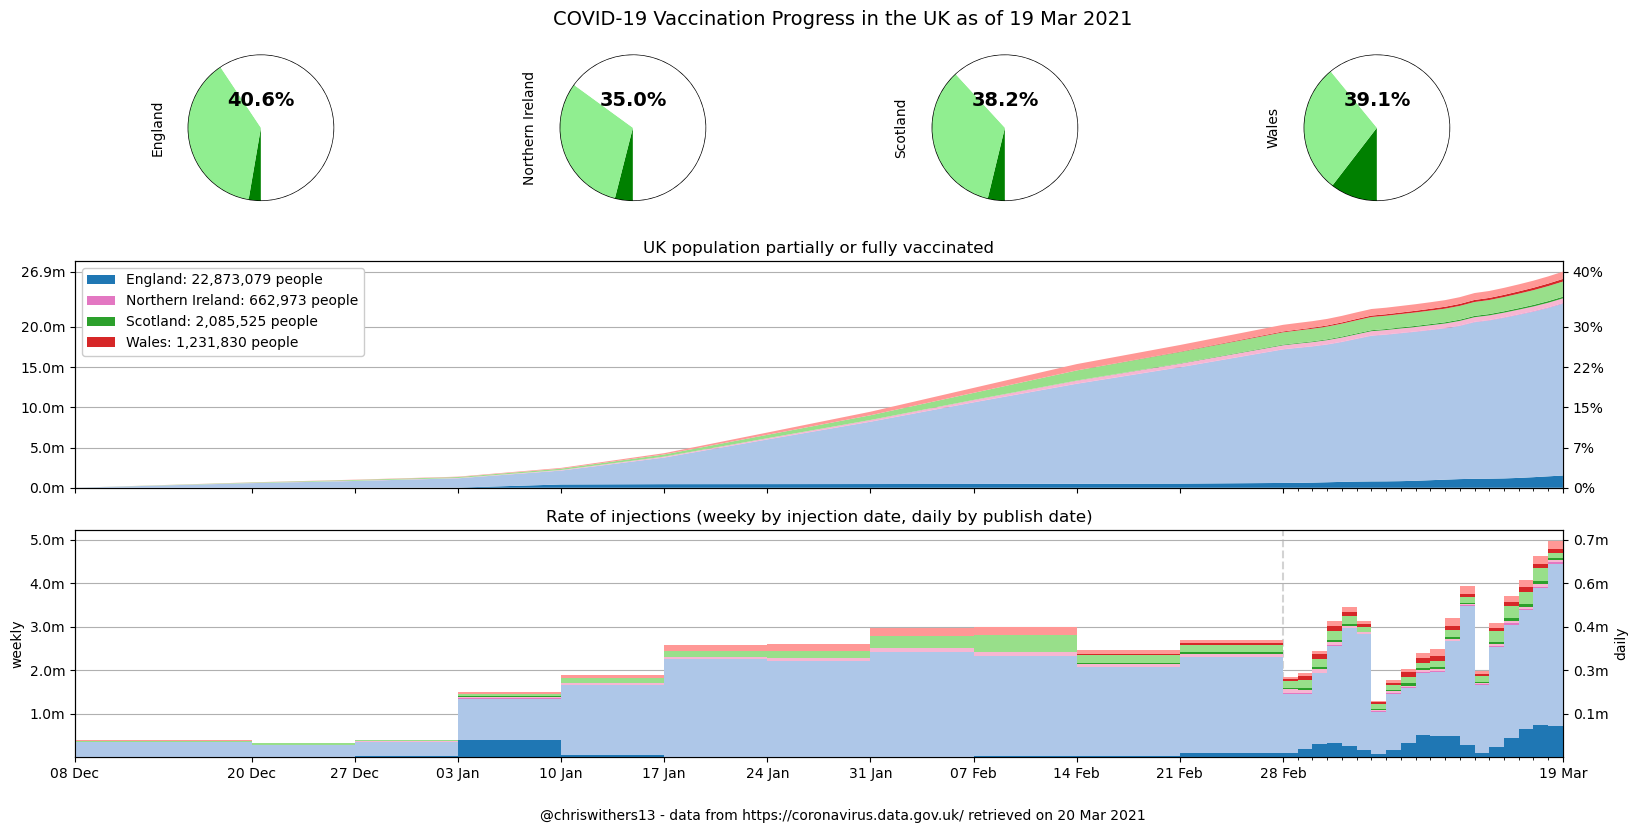

In [4]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,19 Mar 21,"+535,489","+100,730","+100,730","+22,873,079","+1,520,680","+1,520,680"
Northern Ireland,19 Mar 21,"+7,392","+4,604","+4,604","+662,973","+75,313","+75,313"
Scotland,19 Mar 21,"+19,065","+5,593","+5,593","+2,085,525","+207,028","+207,028"
Wales,19 Mar 21,"+27,729","+10,554","+10,554","+1,231,830","+329,530","+329,530"


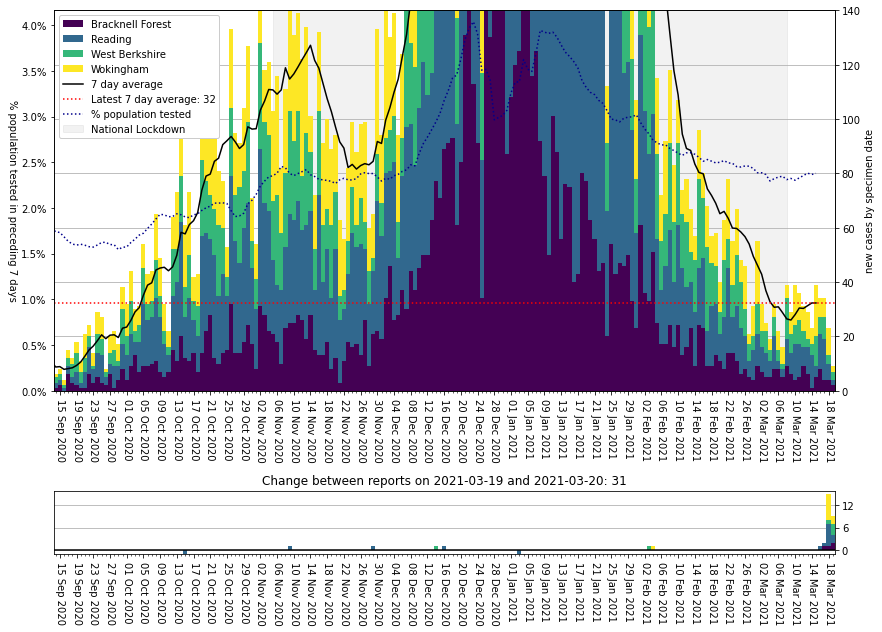

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

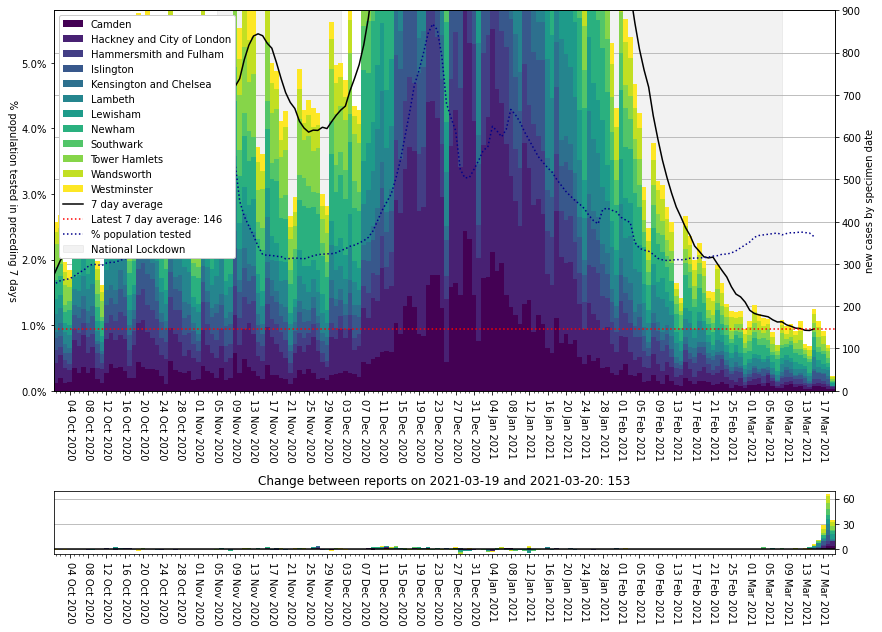

In [7]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000016,Barnsley,177.424190,438.0,2021-03-19
S12000040,West Lothian,167.121791,306.0,2021-03-19
E07000236,Redditch,155.991602,133.0,2021-03-19
E07000150,Corby,155.085990,112.0,2021-03-19
E06000013,North Lincolnshire,147.424140,254.0,2021-03-19
E06000010,"Kingston upon Hull, City of",131.650871,342.0,2021-03-19
E08000018,Rotherham,125.089013,332.0,2021-03-19
E08000032,Bradford,119.494012,645.0,2021-03-19
E06000031,Peterborough,115.693245,234.0,2021-03-19


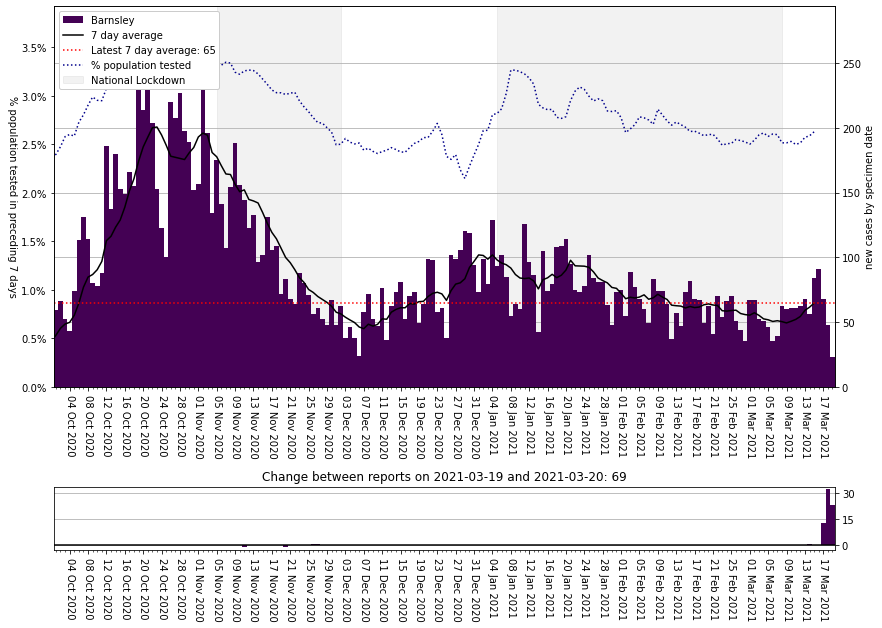

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,61.305850,700.0,2021-03-19
E08000035,Leeds,84.222312,668.0,2021-03-19
E08000032,Bradford,119.494012,645.0,2021-03-19
S12000049,Glasgow City,100.138994,634.0,2021-03-19
E08000019,Sheffield,97.973337,573.0,2021-03-19
E08000016,Barnsley,177.424190,438.0,2021-03-19
E08000034,Kirklees,92.999566,409.0,2021-03-19
E08000003,Manchester,69.819013,386.0,2021-03-19
E08000036,Wakefield,109.958887,383.0,2021-03-19


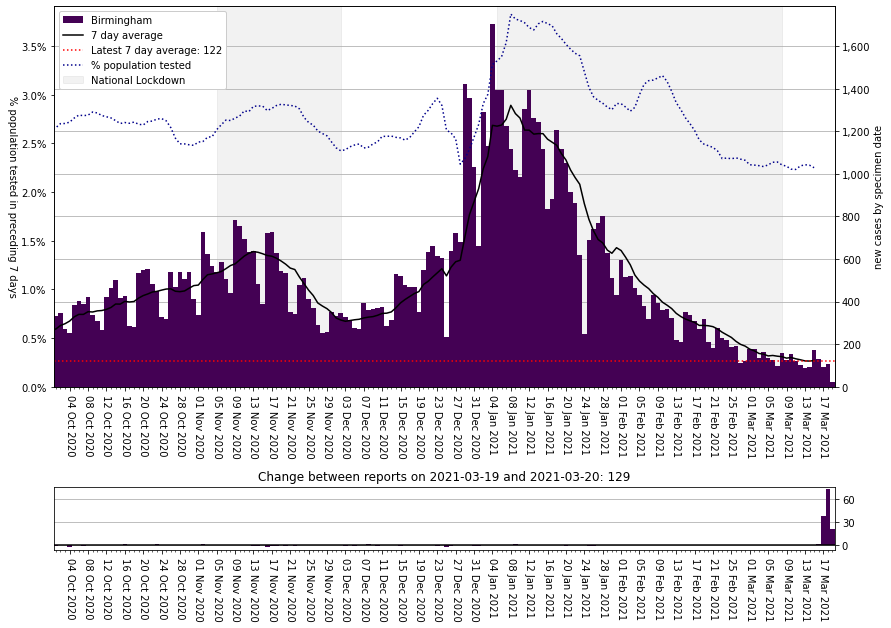

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.2

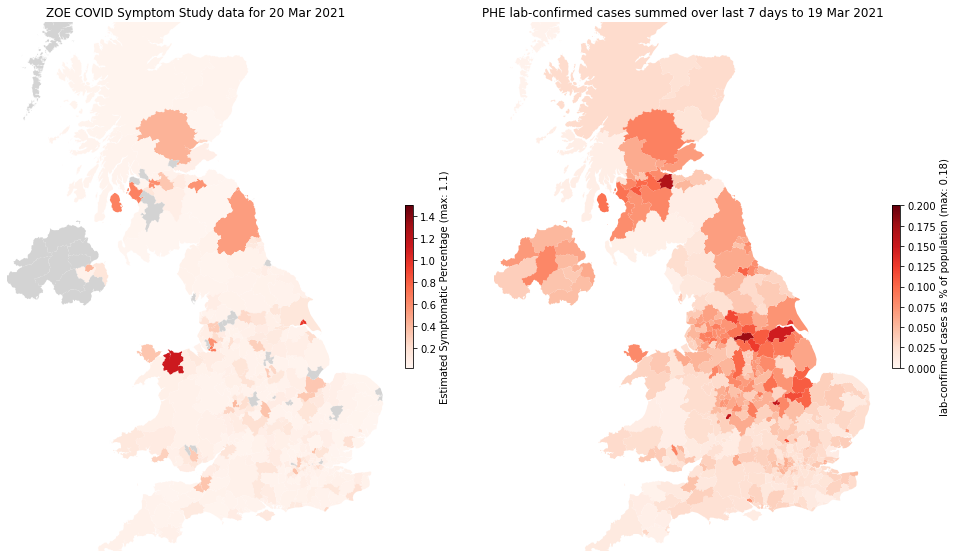

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

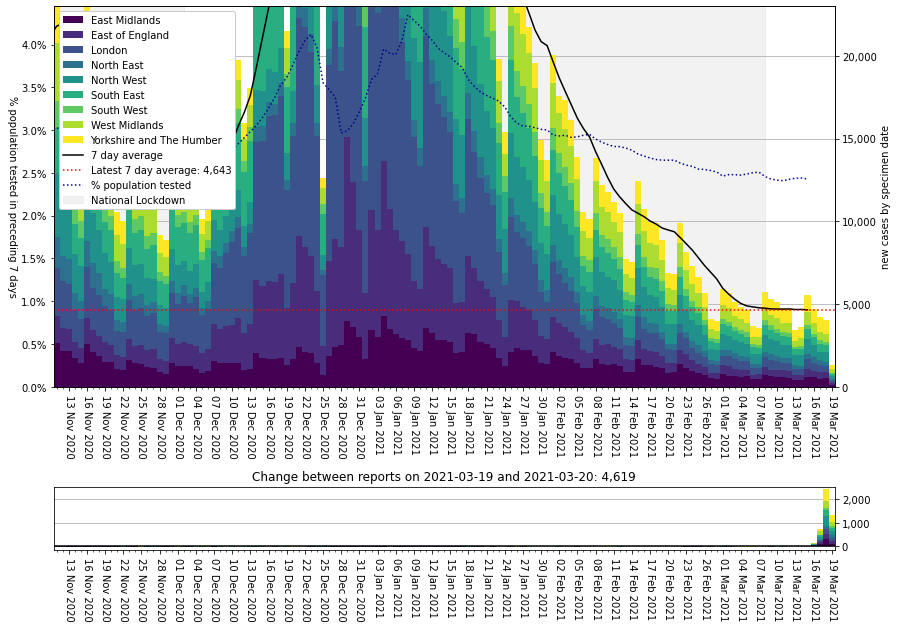

In [16]:
plot_areas(for_date, area_type=region, ylim=23_000, earliest='2020-11-11')

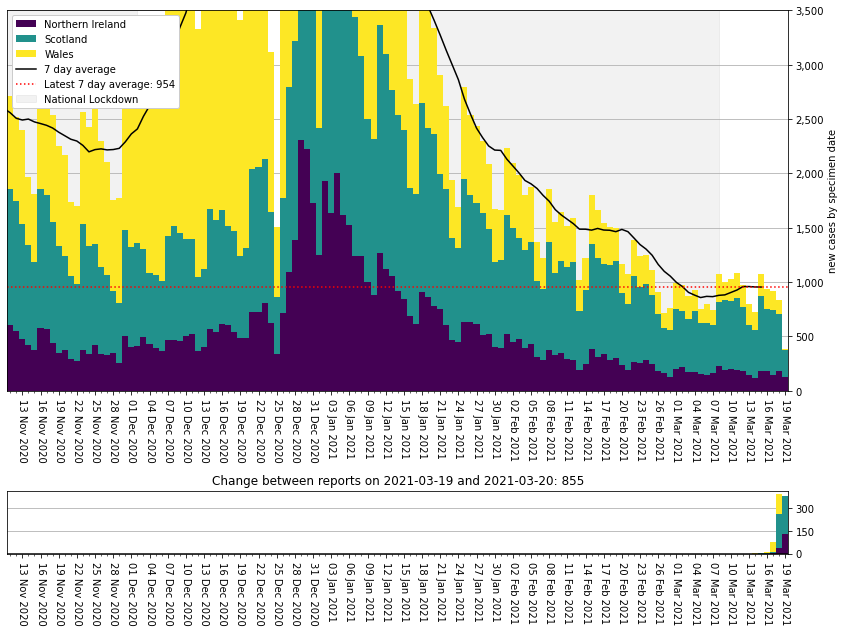

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=3_500, diff_ylims=None, earliest='2020-11-11')